# 08-LEARN-DataAnalysisML

In [1]:
import pandas as pd

In [2]:
from constrain.lab.transformation import ODtime, ng_to_nmol

This is the data after data processing in the previous notebook. 

Lets setup AutoML

In [4]:
import h2o
from h2o.automl import H2OAutoML

In [5]:
# If this doesnt work - install java. 
# Start the H2O cluster (locally)
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_341"; Java(TM) SE Runtime Environment (build 1.8.0_341-b10); Java HotSpot(TM) 64-Bit Server VM (build 25.341-b10, mixed mode)
  Starting server from /Users/lucaslevassor/opt/anaconda3/envs/constrain/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmpooh377tp
  JVM stdout: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmpooh377tp/h2o_lucaslevassor_started_from_python.out
  JVM stderr: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmpooh377tp/h2o_lucaslevassor_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,10 secs
H2O_cluster_timezone:,Europe/Copenhagen
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_lucaslevassor_wcjt61
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.541 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


### Import out dataframe to h20 object

Train a model based on the target and the df

In [7]:
# Run ML with new input 

new_input_for_ml = pd.read_csv('../data/processed/input_for_ml_reseq.csv')
new_input_for_ml

,Line Name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_A02,1,3,8,1,0.269401
2,yp49_A04,1,3,8,2,0.202699
3,yp49_A06,1,2,6,2,1.133272
4,yp49_A07,1,1,5,3,0.981070
...,...,...,...,...,...,...
161,yp51_E05,8,3,6,8,0.000000
162,yp51_E07,8,1,8,9,6.795506
163,yp51_E08,8,4,5,9,0.668263
164,yp51_E11,8,3,7,10,0.000000


In [8]:
df_test = h2o.H2OFrame(pd.concat([new_input_for_ml], axis='columns'))
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:166
Cols:6




,Line Name,0,1,2,3,Amt_norm
type,string,int,int,int,int,real
mins,NaN,1.0,1.0,5.0,1.0,0.0
mean,NaN,4.566265060240965,2.6927710843373482,6.566265060240965,5.319277108433736,17.20841465493667
maxs,NaN,8.0,4.0,8.0,10.0,277.3078163064027
sigma,NaN,2.2519635665513875,1.1581890914364779,1.1723353650321857,2.8392042347076565,40.8029369946811
zeros,0,0,0,0,0,59
missing,0,0,0,0,0,0
0,yp49_A01,1.0,2.0,5.0,1.0,0.972700677969159
1,yp49_A02,1.0,3.0,8.0,1.0,0.2694007038642038
2,yp49_A04,1.0,3.0,8.0,2.0,0.2026994926097329


In [9]:
# Since the data is categorical we need to make it from numerical to categorical 

df_test['0']= df_test['0'].asfactor()
df_test['1']= df_test['1'].asfactor()
df_test['2'] = df_test['2'].asfactor()
df_test['3'] = df_test['3'].asfactor()


In [10]:
df_test.describe()

Rows:166
Cols:6




,Line Name,0,1,2,3,Amt_norm
type,string,enum,enum,enum,enum,real
mins,NaN,,,,,0.0
mean,NaN,,,,,17.20841465493667
maxs,NaN,,,,,277.3078163064027
sigma,NaN,,,,,40.8029369946811
zeros,0,,,,,59
missing,0,0,0,0,0,0
0,yp49_A01,1,2,5,1,0.972700677969159
1,yp49_A02,1,3,8,1,0.2694007038642038
2,yp49_A04,1,3,8,2,0.2026994926097329


Set some arguments for the autoML. 


Important here is that we dont split the dataset but rather keep the cross-validation validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split. See: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html


### RUN automl

Here we are defining the autoML object and after we can train it

In [67]:
# Select the columns we want to train on
feature_cols = [0, 1, 2, 3]

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs=int(3600 * 1),  # 1 hour, if unlimited time is wanted then set this to zero = 0
    max_models=None,  # no limit
    nfolds=5,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
    seed=1,            # Reproducibility
    keep_cross_validation_predictions=True 
)

Train a model based on the target and the df. 


It has been Commented out and saved as showed below

In [68]:
%%time

AutoML.train(
     x=feature_cols,
     y='Amt_norm',
     training_frame=df_test,
 )


AutoML progress: |
10:03:52.439: _train param, Dropping bad and constant columns: [Line Name]


10:03:53.914: _train param, Dropping bad and constant columns: [Line Name]

█
10:03:54.741: _train param, Dropping bad and constant columns: [Line Name]
10:03:54.741: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 166.0.
10:03:54.754: _train param, Dropping unused columns: [Line Name]
10:03:55.130: _train param, Dropping bad and constant columns: [Line Name]

█
10:03:56.82: _train param, Dropping bad and constant columns: [Line Name]

█
10:03:57.507: _train param, Dropping bad and constant columns: [Line Name]

██
10:03:58.690: _train param, Dropping bad and constant columns: [Line Name]
10:03:59.240: _train param, Dropping bad and constant columns: [Line Name]
10:03:59.844: _train param, Dropping unused columns: [Line Name]

█
10:04:00.130: _train param, Dropping unused columns: [Line Name]
10:04:00.445: _t

,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,19,Input,0.0,,,,,,,,,
1,,2,50,RectifierDropout,50.0,0.0,0.0,0.16173,0.368391,0.0,-0.001003,0.267062,0.250013,0.260864
2,,3,50,RectifierDropout,50.0,0.0,0.0,0.005819,0.017108,0.0,-0.066256,0.193189,0.754518,0.259129
3,,4,1,Linear,,0.0,0.0,0.000321,0.000384,0.0,0.122761,0.214855,-0.18853,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 282.83257569367237
RMSE: 16.817626934073438
MAE: 8.76422989968706
RMSLE: 1.2802633342740897
Mean Residual Deviance: 282.83257569367237

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 574.2995525959029
RMSE: 23.964547827904095
MAE: 11.311771516327095
RMSLE: NaN
Mean Residual Deviance: 574.2995525959029

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,11.285565,4.456542,15.635851,8.455390,9.575741,6.402133,16.358710
1,mean_residual_deviance,572.792600,376.975500,822.941350,273.085850,630.597660,114.429060,1022.909300
2,mse,572.792600,376.975500,822.941350,273.085850,630.597660,114.429060,1022.909300
3,r2,0.599910,0.265682,0.160626,0.841231,0.765088,0.657049,0.575556
4,residual_deviance,572.792600,376.975500,822.941350,273.085850,630.597660,114.429060,1022.909300
5,rmse,22.600815,8.803112,28.686954,16.525309,25.111704,10.697152,31.982954
6,rmsle,1.155670,0.193237,1.275359,NaN,0.913397,1.342434,1.091490



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-07-27 10:31:38,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-07-27 10:31:38,16 min 42.694 sec,138333 obs/sec,10.0,1,1660.0,41.857719,1752.068678,19.845787,-0.058748
2,,2022-07-27 10:31:43,16 min 47.695 sec,263081 obs/sec,7940.0,794,1318040.0,16.851626,283.977303,8.190596,0.828397
3,,2022-07-27 10:31:44,16 min 48.785 sec,272492 obs/sec,10010.0,1001,1661660.0,16.817627,282.832576,8.764230,0.829089



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.118963
1,1.3,0.934875,0.934875,0.111216
2,2.7,0.892816,0.892816,0.106212
3,0.8,0.727528,0.727528,0.086549
4,1.4,0.698324,0.698324,0.083075
5,0.5,0.582923,0.582923,0.069347
6,2.5,0.491540,0.491540,0.058475
7,0.2,0.479501,0.479501,0.057043
8,2.6,0.421438,0.421438,0.050136
9,1.2,0.359580,0.359580,0.042777


## Processing model


In [70]:
# saving the models
leaderboard = AutoML.leaderboard
model_ids = list(leaderboard['model_id'].as_data_frame().iloc[:,0])


# get rid of models with stacked ensemble - they; the tree-based models, the tree ensemble (GBM or Random Forest) ends up memorizing the training data.
#The model has a poor time generalizing on validation data
for model in model_ids:
    if 'StackedEnsemble' in model:
        model_ids.remove(model)

out_path = '../data/processed/ML_data_leaderboard2'

for m_id in model_ids:
     mdl = h2o.get_model(m_id)
     h2o.save_model(model=mdl, path=out_path, force=True)


In [71]:
len(model_ids)

329

Now we want to extract the best models that are not StackedEnsemble

In [72]:

df_from_h2o_object = leaderboard.as_data_frame(use_pandas=True, header=True)
df_from_h2o_object

,model_id,rmse,mse,mae,rmsle,mean_residual_deviance
0,DeepLearning_grid_2_AutoML_1_20220727_100352_model_37,23.964548,574.299553,11.311772,NaN,574.299553
1,DeepLearning_grid_1_AutoML_1_20220727_100352_model_128,24.146314,583.044464,11.137667,NaN,583.044464
2,DeepLearning_grid_2_AutoML_1_20220727_100352_model_1,24.252278,588.172975,11.840271,NaN,588.172975
3,DeepLearning_grid_2_AutoML_1_20220727_100352_model_7,24.365141,593.660115,13.709536,NaN,593.660115
4,StackedEnsemble_BestOfFamily_5_AutoML_1_20220727_100352,24.591208,604.727513,12.368627,NaN,604.727513
...,...,...,...,...,...,...
338,DeepLearning_grid_3_AutoML_1_20220727_100352_model_41,39.577506,1566.378972,21.268860,NaN,1566.378972
339,DeepLearning_grid_3_AutoML_1_20220727_100352_model_93,40.349890,1628.113659,23.929969,NaN,1628.113659
340,DeepLearning_grid_2_AutoML_1_20220727_100352_model_50,40.367736,1629.554090,21.816114,NaN,1629.554090
341,DeepLearning_grid_2_AutoML_1_20220727_100352_model_49,40.946926,1676.650750,25.255833,NaN,1676.650750


In [73]:
index_to_delete = []
for index, row in df_from_h2o_object.iterrows():
    if 'StackedEnsemble' in row['model_id']:
        index_to_delete.append(index)

data_wo_ensemble = df_from_h2o_object.drop(labels=index_to_delete, axis=0)
final_df = h2o.H2OFrame(data_wo_ensemble)
final_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_2_AutoML_1_20220727_100352_model_37,23.9645,574.3,11.3118,nan,574.3
DeepLearning_grid_1_AutoML_1_20220727_100352_model_128,24.1463,583.044,11.1377,nan,583.044
DeepLearning_grid_2_AutoML_1_20220727_100352_model_1,24.2523,588.173,11.8403,nan,588.173
DeepLearning_grid_2_AutoML_1_20220727_100352_model_7,24.3651,593.66,13.7095,nan,593.66
DeepLearning_grid_3_AutoML_1_20220727_100352_model_37,24.6865,609.423,11.5671,1.19476,609.423
DeepLearning_grid_3_AutoML_1_20220727_100352_model_19,24.7654,613.326,11.6343,1.28513,613.326
DeepLearning_grid_2_AutoML_1_20220727_100352_model_8,24.7822,614.159,14.5494,nan,614.159
DeepLearning_grid_1_AutoML_1_20220727_100352_model_113,25.1818,634.125,11.9456,nan,634.125
GBM_grid_1_AutoML_1_20220727_100352_model_42,25.201,635.09,13.4695,nan,635.09
DeepLearning_grid_3_AutoML_1_20220727_100352_model_10,25.2065,635.37,15.2978,nan,635.37


### Saving the best model

In [74]:
best_model = AutoML.get_best_model()
best_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_2_AutoML_1_20220727_100352_model_37


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 3,601 weights/biases, 46.9 KB, 1,661,660 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,19,Input,0.0,,,,,,,,,
1,,2,50,RectifierDropout,50.0,0.0,0.0,0.16173,0.368391,0.0,-0.001003,0.267062,0.250013,0.260864
2,,3,50,RectifierDropout,50.0,0.0,0.0,0.005819,0.017108,0.0,-0.066256,0.193189,0.754518,0.259129
3,,4,1,Linear,,0.0,0.0,0.000321,0.000384,0.0,0.122761,0.214855,-0.18853,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 282.83257569367237
RMSE: 16.817626934073438
MAE: 8.76422989968706
RMSLE: 1.2802633342740897
Mean Residual Deviance: 282.83257569367237

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 574.2995525959029
RMSE: 23.964547827904095
MAE: 11.311771516327095
RMSLE: NaN
Mean Residual Deviance: 574.2995525959029

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,11.285565,4.456542,15.635851,8.455390,9.575741,6.402133,16.358710
1,mean_residual_deviance,572.792600,376.975500,822.941350,273.085850,630.597660,114.429060,1022.909300
2,mse,572.792600,376.975500,822.941350,273.085850,630.597660,114.429060,1022.909300
3,r2,0.599910,0.265682,0.160626,0.841231,0.765088,0.657049,0.575556
4,residual_deviance,572.792600,376.975500,822.941350,273.085850,630.597660,114.429060,1022.909300
5,rmse,22.600815,8.803112,28.686954,16.525309,25.111704,10.697152,31.982954
6,rmsle,1.155670,0.193237,1.275359,NaN,0.913397,1.342434,1.091490



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-07-27 10:31:38,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-07-27 10:31:38,16 min 42.694 sec,138333 obs/sec,10.0,1,1660.0,41.857719,1752.068678,19.845787,-0.058748
2,,2022-07-27 10:31:43,16 min 47.695 sec,263081 obs/sec,7940.0,794,1318040.0,16.851626,283.977303,8.190596,0.828397
3,,2022-07-27 10:31:44,16 min 48.785 sec,272492 obs/sec,10010.0,1001,1661660.0,16.817627,282.832576,8.764230,0.829089



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.118963
1,1.3,0.934875,0.934875,0.111216
2,2.7,0.892816,0.892816,0.106212
3,0.8,0.727528,0.727528,0.086549
4,1.4,0.698324,0.698324,0.083075
5,0.5,0.582923,0.582923,0.069347
6,2.5,0.491540,0.491540,0.058475
7,0.2,0.479501,0.479501,0.057043
8,2.6,0.421438,0.421438,0.050136
9,1.2,0.359580,0.359580,0.042777


In [75]:
model_path = h2o.save_model(model=best_model, path="../data/processed/ML_models", force=True)

### Exporting the leaderboard

In [76]:
# saving the leaderboard
import os
h2o.export_file(lb, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


### Importing the leaderboard

In [21]:
models_path = "../data/processed/ML_data_leaderboard2"

lb = h2o.import_file(path=os.path.join(models_path, "aml_leaderboard.h2o"))
lb

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_3_AutoML_2_20220726_101939_model_1,23.9082,571.604,11.5803,nan,571.604
DeepLearning_grid_3_AutoML_2_20220726_101939_model_10,23.9759,574.846,13.5684,nan,574.846
StackedEnsemble_BestOfFamily_7_AutoML_2_20220726_101939,24.2198,586.599,12.1232,nan,586.599
StackedEnsemble_BestOfFamily_5_AutoML_2_20220726_101939,24.2989,590.436,12.0126,nan,590.436
DeepLearning_grid_2_AutoML_2_20220726_101939_model_8,24.3408,592.475,13.8162,nan,592.475
DeepLearning_grid_2_AutoML_2_20220726_101939_model_4,24.4395,597.288,13.9553,nan,597.288
DeepLearning_grid_1_AutoML_2_20220726_101939_model_74,24.5496,602.68,11.1824,nan,602.68
DeepLearning_grid_2_AutoML_2_20220726_101939_model_37,24.6449,607.37,11.4348,1.1355,607.37
DeepLearning_grid_1_AutoML_2_20220726_101939_model_236,24.8821,619.118,12.1355,nan,619.118
DeepLearning_grid_2_AutoML_2_20220726_101939_model_10,24.9309,621.548,13.8228,nan,621.548


## Importing the best model

In [78]:
best_model = h2o.load_model("../data/processed/ML_models/DeepLearning_grid_2_AutoML_1_20220727_100352_model_37")
my_local_model = h2o.download_model(best_model, path="../data/processed/ML_models")
uploaded_model = h2o.upload_model(my_local_model)


### Investigate model

In [80]:
best_model.cross_validation_holdout_predictions()

predict
12.1411
-1.41308
0.59327
17.8255
0.473865
-0.00679327
-1.44026
2.18787
-0.251762
0.473865


Get the cross validation predictions

In [81]:
# This is where list of cv preds are stored (one element per fold):
cross_validation_holdout_predictions = best_model.cross_validation_holdout_predictions()
print(cross_validation_holdout_predictions)
print(len(cross_validation_holdout_predictions))

predict
12.1411
-1.41308
0.59327
17.8255
0.473865
-0.00679327
-1.44026
2.18787
-0.251762
0.473865



166


In [82]:
cross_validation_holdout_predictions.frame_id


'cv_holdout_prediction_DeepLearning_grid_2_AutoML_1_20220727_100352_model_37'

In [83]:
cv_fram = cross_validation_holdout_predictions.as_data_frame()
cv_fram.tail(50)

,predict
116,4.550711
117,5.403373
118,35.153574
119,23.607342
120,21.136806
121,1.742782
122,0.922091
123,5.950744
124,27.052959
125,56.826483


In [84]:
# However you most likely want a single-column frame including all cv preds
cross_validation_predictions = best_model.cross_validation_predictions()
print(len(cross_validation_predictions))

5


In [97]:
as_data_frame_df_test = df_test.as_data_frame()
as_data_frame_CV_predictions = cross_validation_holdout_predictions.as_data_frame()

In [259]:
df3 = pd.merge(as_data_frame_df_test, as_data_frame_CV_predictions, left_index=True, right_index=True)
df3.head(50)

,Line Name,0,1,2,3,Amt_norm,predict
0,yp49_A01,1,2,5,1,0.972701,12.141140
1,yp49_A02,1,3,8,1,0.269401,-1.413080
2,yp49_A04,1,3,8,2,0.202699,0.593270
3,yp49_A06,1,2,6,2,1.133272,17.825478
4,yp49_A07,1,1,5,3,0.981070,0.473865
5,yp49_A08,1,1,8,3,0.223689,-0.006793
6,yp49_A09,1,3,7,3,0.000000,-1.440262
7,yp49_B02,1,2,8,5,0.255908,2.187867
8,yp49_B03,1,1,8,5,0.000000,-0.251762
9,yp49_B04,1,1,5,6,0.000000,0.473865


<AxesSubplot:xlabel='Line Name'>

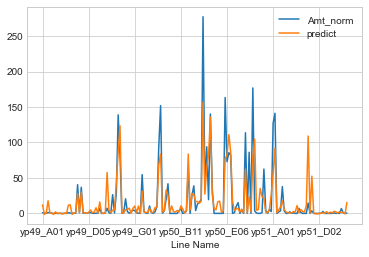

In [106]:
df3.plot(y = ['Amt_norm','predict'], x =  'Line Name')

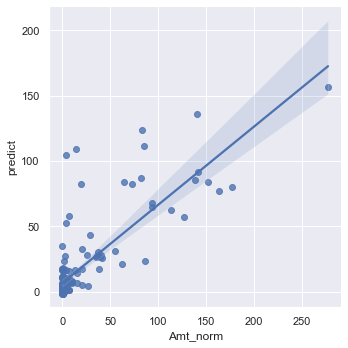

In [324]:
import seaborn as sns
from scipy.stats import pearsonr

#set seaborn plotting aesthetics as default
sns.set()

sns.set_context("paper", font_scale=6.0, rc={"lines.linewidth": 1.5})
sns.set(rc = {'figure.figsize':(20,20)})

sns.lmplot(data=df3, x="Amt_norm", y="predict",  palette="viridis")
None

### Learning curve

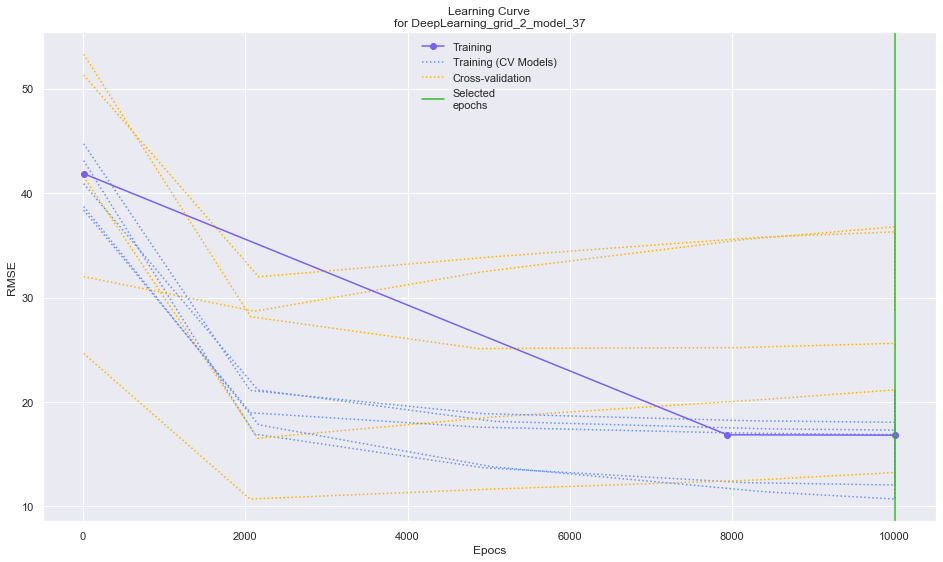

In [325]:

learning_curve = uploaded_model.learning_curve_plot()


plt.xlabel('Epocs')
plt.ylabel('RMSE')

#plt.title('Number of records by State')
None

In [276]:
as_data_frame_df_test

,Line Name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_A02,1,3,8,1,0.269401
2,yp49_A04,1,3,8,2,0.202699
3,yp49_A06,1,2,6,2,1.133272
4,yp49_A07,1,1,5,3,0.981070
...,...,...,...,...,...,...
161,yp51_E05,8,3,6,8,0.000000
162,yp51_E07,8,1,8,9,6.795506
163,yp51_E08,8,4,5,9,0.668263
164,yp51_E11,8,3,7,10,0.000000


### Find predicted genotypes

In [147]:
import numpy as np

In [188]:
all_genotypes = pd.read_csv('../notebooks/systematic_names_on_all_combinations')
all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))
all_genotypes_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3
1,1,5,1
1,1,5,2
1,1,5,3
1,1,5,4
1,1,5,5
1,1,5,6
1,1,5,7
1,1,5,8
1,1,5,9
1,1,5,10


In [189]:
#merge_ = pd.merge(new_input_for_ml,all_genotypes, on= ['0','1','2','3'])
#merge_

input_fixed = new_input_for_ml[['0','1','2','3']]
input_fixed

,0,1,2,3
0,1,2,5,1
1,1,3,8,1
2,1,3,8,2
3,1,2,6,2
4,1,1,5,3
...,...,...,...,...
161,8,3,6,8
162,8,1,8,9
163,8,4,5,9
164,8,3,7,10


### Getting rid of the genotypes we have already tested:

In [190]:
df_diff = all_genotypes[~all_genotypes.apply(tuple,1).isin(input_fixed.apply(tuple,1))]
df_diff

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
3,1,1,5,4
4,1,1,5,5
6,1,1,5,7
...,...,...,...,...
1275,8,4,8,6
1276,8,4,8,7
1277,8,4,8,8
1278,8,4,8,9


In [191]:
# make the diff into a df 
all_genotypes_df = h2o.H2OFrame(pd.concat([df_diff], axis='columns'))
all_genotypes_df['0']= all_genotypes_df['0'].asfactor()
all_genotypes_df['1']= all_genotypes_df['1'].asfactor()
all_genotypes_df['2'] = all_genotypes_df['2'].asfactor()
all_genotypes_df['3'] = all_genotypes_df['3'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [252]:
predicted = best_model.predict(all_genotypes_df)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [253]:
len(predicted)

1122

In [258]:
predicted_norm = predicted.as_data_frame()
predicted_norm.head()

,predict
0,2.445501
1,2.445501
2,2.445501
3,2.445501
4,2.445501


In [268]:
# making predictions into a list
predicted_list = predicted_norm['predict'].values.tolist()

# Adding predictions to our dataframe
df_diff['predicted_norm_strict'] = predicted_list

# Sorting the dataframe
predicted_merged_sorted = df_diff.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_798/4268383410.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['predicted_norm_strict'] = predicted_list


,0,1,2,3,predicted_norm_strict
696,5,2,6,7,226.368934
695,5,2,6,6,226.368934
694,5,2,6,5,226.368934
693,5,2,6,4,226.368934
691,5,2,6,2,226.368934
...,...,...,...,...,...
245,2,3,5,6,2.418476
244,2,3,5,5,2.418476
240,2,3,5,1,2.418476
241,2,3,5,2,2.418476


If we want the names on the genotypes we can do the following: 

In [269]:
g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]

## Top 20 predicted producers

In [270]:
df_with_genotypes = pd.DataFrame(list_of_lists )
df_with_genotypes = df_with_genotypes.T
df_with_genotypes.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_stric_production']
df_with_genotypes.head(20)


,G8H,pG8H,pCPR,CPR,Predicted_stric_production
0,Smus,ENO2,TPI1,Ani,226.368934
1,Smus,ENO2,TPI1,Ahu,226.368934
2,Smus,ENO2,TPI1,Rse,226.368934
3,Smus,ENO2,TPI1,Clo,226.368934
4,Smus,ENO2,TPI1,Aan,226.368934
5,Smus,ENO2,TPI1,Cro,226.368934
6,Smus,ENO2,TPI1,Cpo,226.368934
7,Smus,ENO2,TPI1,Cac,226.368934
8,Smus,ENO2,TPI1,Oeu,226.368934
9,Smus,ENO2,CCW12,Clo,138.83489


In [243]:
#g8h_trans <- tibble(homolog = c("Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"), `0` = c("1","2","3","4","5","6","7","8"))
#cpr_trans <- tibble(homolog = c("Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"), `3` = c("1","2","3","4","5","6","7","8","9","10"))
#pg8h_trans <- tibble(homolog = c("CYC1", "ENO2","PCK1","RPL15B"), `1` = c("1","2","3","4"))
#pcpr_trans <- tibble(homolog = c("CCW12", "TPI1","MLS1","URE2"), `2` = c("5","6","7","8"))

In [326]:
df_with_genotypes.to_csv('../data/processed/ML_predicted/2022_2807_categorical_DeepLearning_grid_2_AutoML_1_20220727_100352_model_37')